In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
train_df = pd.read_csv('./titanic/train.csv')
test_df = pd.read_csv('./titanic/test.csv')
combine = [train_df, test_df]

In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Matthews, Mr. William John",male,347082,G6,S
freq,1,577,7,4,644


In [10]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


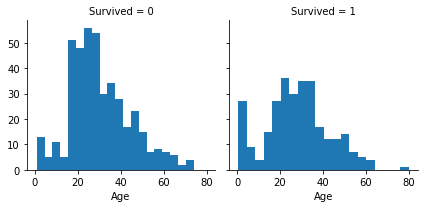

In [14]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/Users/zabegaev99/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


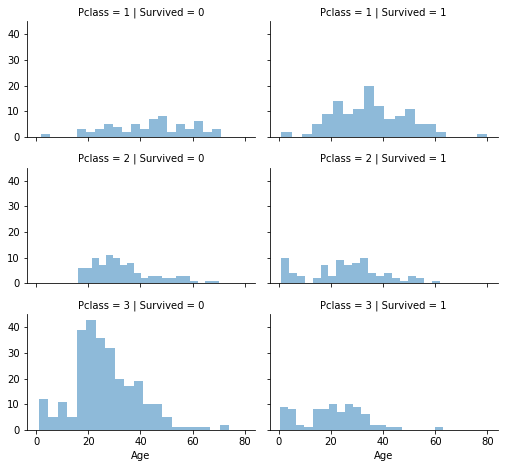

In [15]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/Users/zabegaev99/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/zabegaev99/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/zabegaev99/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


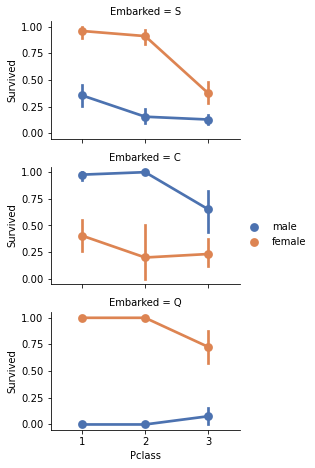

In [16]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [17]:
print("Before", train_df.shape, test_df.shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [18]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', \
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [20]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [21]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [22]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [23]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


/Users/zabegaev99/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


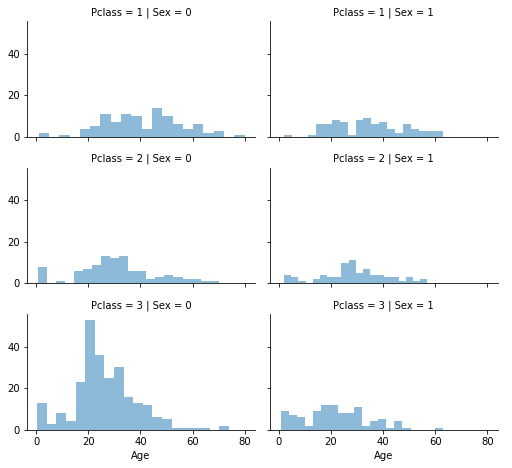

In [24]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [25]:
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_mean = guess_df.mean()
            age_std = guess_df.std()
            age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

#             age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [26]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.386256
2,"(32.0, 48.0]",0.321799
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [27]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [28]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [30]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [31]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [32]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,6,2,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [33]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [36]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [37]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [38]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,2,1,2,1,1,6
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [39]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [39]:
%%time
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_train, Y_train) * 100
acc_decision_tree

CPU times: user 14.1 ms, sys: 2.71 ms, total: 16.8 ms
Wall time: 15.7 ms


87.20538720538721

In [40]:
%%time

forest = RandomForestClassifier()
forest.fit(X_train, Y_train)
Y_pred = forest.predict(X_test)
acc_decision_tree = forest.score(X_train, Y_train) * 100
acc_decision_tree

CPU times: user 292 ms, sys: 9.33 ms, total: 301 ms
Wall time: 301 ms


87.20538720538721

# K Neighbors

In [41]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = knn.score(X_train, Y_train) * 100
acc_knn

84.28731762065095

In [42]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidian', 'manhattan'],
}
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=None, n_jobs=-1, verbose=2)

In [43]:
knn_grid_search.fit(X_train, Y_train)
print(knn_grid_search.best_params_)
knn_best_grid = knn_grid_search.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.0s


{'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.8s finished


In [44]:
Y_pred = knn_best_grid.predict(X_test)
acc_best_knn = knn_best_grid.score(X_train, Y_train) * 100
acc_best_knn

84.17508417508418

In [45]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)

# XGBOOST

In [57]:
import xgboost
model_xgb = xgboost.XGBClassifier()

In [58]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators' : [500, 600, 700, 800],
}
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, 
                           cv=3, verbose=2)

In [59]:
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] max_depth=3, n_estimators=500 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... max_depth=3, n_estimators=500, total=   0.7s
[CV] max_depth=3, n_estimators=500 ...................................
[CV] .................... max_depth=3, n_estimators=500, total=   0.2s
[CV] max_depth=3, n_estimators=500 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .................... max_depth=3, n_estimators=500, total=   0.2s
[CV] max_depth=3, n_estimators=600 ...................................
[CV] .................... max_depth=3, n_estimators=600, total=   0.3s
[CV] max_depth=3, n_estimators=600 ...................................
[CV] .................... max_depth=3, n_estimators=600, total=   0.2s
[CV] max_depth=3, n_estimators=600 ...................................
[CV] .................... max_depth=3, n_estimators=600, total=   0.2s
[CV] max_depth=3, n_estimators=700 ...................................
[CV] .................... max_depth=3, n_estimators=700, total=   0.2s
[CV] max_depth=3, n_estimators=700 ...................................
[CV] .................... max_depth=3, n_estimators=700, total=   0.6s
[CV] max_depth=3, n_estimators=700 ...................................
[CV] .................... max_depth=3, n_estimators=700, total=   0.3s
[CV] max_depth=3, n_estimators=800 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   27.2s finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [64]:
acc_xgboost = grid_search.score(X_train, Y_train) * 100
acc_xgboost
# submission = pd.DataFrame({
#                             "PassengerId": data_test["PassengerId"],
#                             "Survived": xgb_pred
#                             })
# submission.to_csv('titanic_prediction_xgb.csv', index=False)

86.64421997755332

# Keras

In [48]:
from keras.optimizers import Adam
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, BatchNormalization, Activation, Input

In [80]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(8, activation = 'relu', input_dim = 8))
classifier.add(Dropout(0.1))
classifier.add(Dense(2, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

classifier.compile(
    optimizer=Adam(0.01), 
    loss='binary_crossentropy', 
    metrics=['accuracy', 'mean_squared_error'])

classifier.fit(X_train, Y_train, epochs=500, batch_size=891)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 1.5231 - accuracy: 0.3850 - mean_squared_error: 0.4625
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 1.4176 - accuracy: 0.3805 - mean_squared_error: 0.4472
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 1.2814 - accuracy: 0.3872 - mean_squared_error: 0.4239
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 1.1146 - accuracy: 0.3906 - mean_squared_error: 0.3977
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 1.0487 - accuracy: 0.4074 - mean_squared_error: 0.3705
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 0.9563 - accuracy: 0.3939 - mean_squared_error: 0.3463
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 0.8688 - accuracy: 0.3928 - mean_squared_error: 0.3191
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.8066 - accuracy: 0.3692 - mean_squared_error:

1/1 [==============================] - 0s 3ms/step - loss: 0.5421 - accuracy: 0.7901 - mean_squared_error: 0.1801
Epoch 66/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5453 - accuracy: 0.7755 - mean_squared_error: 0.1820
Epoch 67/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5433 - accuracy: 0.7733 - mean_squared_error: 0.1810
Epoch 68/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5432 - accuracy: 0.7789 - mean_squared_error: 0.1806
Epoch 69/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5407 - accuracy: 0.7778 - mean_squared_error: 0.1798
Epoch 70/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5441 - accuracy: 0.7688 - mean_squared_error: 0.1811
Epoch 71/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5389 - accuracy: 0.7767 - mean_squared_error: 0.1791
Epoch 72/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.7733 - mean_squared_error: 0.17

1/1 [==============================] - 0s 4ms/step - loss: 0.4994 - accuracy: 0.7890 - mean_squared_error: 0.1628
Epoch 129/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.7868 - mean_squared_error: 0.1621
Epoch 130/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4985 - accuracy: 0.7845 - mean_squared_error: 0.1619
Epoch 131/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5119 - accuracy: 0.7744 - mean_squared_error: 0.1680
Epoch 132/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.7823 - mean_squared_error: 0.1636
Epoch 133/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7811 - mean_squared_error: 0.1626
Epoch 134/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5100 - accuracy: 0.7744 - mean_squared_error: 0.1668
Epoch 135/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4963 - accuracy: 0.7856 - mean_squared_erro

Epoch 192/500
1/1 [==============================] - 0s 9ms/step - loss: 0.4782 - accuracy: 0.7868 - mean_squared_error: 0.1546
Epoch 193/500
1/1 [==============================] - ETA: 0s - loss: 0.4814 - accuracy: 0.7879 - mean_squared_error: 0.155 - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7879 - mean_squared_error: 0.1554
Epoch 194/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4782 - accuracy: 0.7879 - mean_squared_error: 0.1542
Epoch 195/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.7946 - mean_squared_error: 0.1542
Epoch 196/500
1/1 [==============================] - 0s 4ms/step - loss: 0.4840 - accuracy: 0.7823 - mean_squared_error: 0.1567
Epoch 197/500
1/1 [==============================] - 0s 11ms/step - loss: 0.4743 - accuracy: 0.7912 - mean_squared_error: 0.1523
Epoch 198/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4811 - accuracy: 0.7901 - mean_squared_error: 0.1554
Epoch 199/500
1/1 [============

1/1 [==============================] - 0s 13ms/step - loss: 0.4582 - accuracy: 0.7946 - mean_squared_error: 0.1462
Epoch 256/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4629 - accuracy: 0.7901 - mean_squared_error: 0.1482
Epoch 257/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4654 - accuracy: 0.7868 - mean_squared_error: 0.1494
Epoch 258/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4579 - accuracy: 0.7991 - mean_squared_error: 0.1462
Epoch 259/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4657 - accuracy: 0.7957 - mean_squared_error: 0.1489
Epoch 260/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.7879 - mean_squared_error: 0.1541
Epoch 261/500
1/1 [==============================] - 0s 11ms/step - loss: 0.4542 - accuracy: 0.7991 - mean_squared_error: 0.1446
Epoch 262/500
1/1 [==============================] - 0s 8ms/step - loss: 0.4547 - accuracy: 0.8036 - mean_squared_er

1/1 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.8137 - mean_squared_error: 0.1363
Epoch 319/500
1/1 [==============================] - 0s 11ms/step - loss: 0.4321 - accuracy: 0.8137 - mean_squared_error: 0.1356
Epoch 320/500
1/1 [==============================] - 0s 4ms/step - loss: 0.4515 - accuracy: 0.8013 - mean_squared_error: 0.1418
Epoch 321/500
1/1 [==============================] - 0s 15ms/step - loss: 0.4510 - accuracy: 0.8036 - mean_squared_error: 0.1414
Epoch 322/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.8002 - mean_squared_error: 0.1396
Epoch 323/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8103 - mean_squared_error: 0.1397
Epoch 324/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8171 - mean_squared_error: 0.1366
Epoch 325/500
1/1 [==============================] - 0s 9ms/step - loss: 0.4484 - accuracy: 0.8070 - mean_squared_er

Epoch 382/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8238 - mean_squared_error: 0.1342
Epoch 383/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4376 - accuracy: 0.8182 - mean_squared_error: 0.1362
Epoch 384/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4310 - accuracy: 0.8249 - mean_squared_error: 0.1346
Epoch 385/500
1/1 [==============================] - 0s 4ms/step - loss: 0.4345 - accuracy: 0.8204 - mean_squared_error: 0.1350
Epoch 386/500
1/1 [==============================] - 0s 4ms/step - loss: 0.4354 - accuracy: 0.8272 - mean_squared_error: 0.1351
Epoch 387/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4379 - accuracy: 0.8204 - mean_squared_error: 0.1363
Epoch 388/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.8272 - mean_squared_error: 0.1369
Epoch 389/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.8249 - mea

1/1 [==============================] - 0s 5ms/step - loss: 0.4261 - accuracy: 0.8193 - mean_squared_error: 0.1334
Epoch 446/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8137 - mean_squared_error: 0.1363
Epoch 447/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4158 - accuracy: 0.8227 - mean_squared_error: 0.1304
Epoch 448/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.8227 - mean_squared_error: 0.1340
Epoch 449/500
1/1 [==============================] - 0s 9ms/step - loss: 0.4235 - accuracy: 0.8238 - mean_squared_error: 0.1323
Epoch 450/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8238 - mean_squared_error: 0.1334
Epoch 451/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4236 - accuracy: 0.8227 - mean_squared_error: 0.1332
Epoch 452/500
1/1 [==============================] - 0s 4ms/step - loss: 0.4362 - accuracy: 0.8092 - mean_squared_erro

In [81]:
test_loss, test_acc, test_mse = classifier.evaluate(X_train, Y_train)
print(f'Test loss: {test_loss}, test mse: {test_mse}, test accuracy: {test_acc}')

28/28 [==============================] - 0s 6ms/step - loss: 0.4118 - accuracy: 0.8305 - mean_squared_error: 0.1275
Test loss: 0.41182705760002136, test mse: 0.12754906713962555, test accuracy: 0.8305274844169617
